In [ ]:
print("Hello World")

Hello World


In [ ]:
# Storing electrical parameters
voltage = 230        # Line voltage in Volts (V)
current = 10         # Current in Amperes (A)
frequency = 50       # Frequency in Hertz (Hz)
power_factor = 0.85  # Power factor (dimensionless)

# Python automatically knows the type!
print(f"Voltage: {voltage}V")
print(f"Type: {type(voltage)}")  # <class 'int'>

# Calculate power: P = V × I × cos(φ)
real_power = voltage * current * power_factor
print(f"Real Power: {real_power}W")

Voltage: 230V
Type: <class 'int'>
Real Power: 1955.0W


In [ ]:
import math

# Three-phase power system parameters
voltage_ll = 415     # Line-to-line voltage (V)
current = 50         # Line current (A)
power_factor = 0.85  # lagging
phase_angle = math.acos(power_factor)  # in radians

# Calculate powers
apparent_power = math.sqrt(3) * voltage_ll * current  # VA
real_power = apparent_power * power_factor             # W
reactive_power = apparent_power * math.sin(phase_angle) # VAR

print(f"Apparent Power (S): {apparent_power:.2f} VA")
print(f"Real Power (P): {real_power:.2f} W")
print(f"Reactive Power (Q): {reactive_power:.2f} VAR")
print(f"Power Factor: {power_factor}")



Apparent Power (S): 35940.05 VA
Real Power (P): 30549.05 W
Reactive Power (Q): 18932.60 VAR
Power Factor: 0.85


In [ ]:
# Hourly voltage readings from a substation (kV)
voltages = [11.2, 11.1, 11.0, 10.9, 11.1, 11.3, 11.4, 11.2]

# Access individual readings
first_hour = voltages[0]      # 11.2 kV
peak_hour = voltages[-1]      # 11.2 kV (last reading)

# Calculate statistics
average_voltage = sum(voltages) / len(voltages)
max_voltage = max(voltages)
min_voltage = min(voltages)
voltage_swing = max_voltage - min_voltage

print(f"Average Voltage: {average_voltage:.2f} kV")
print(f"Voltage Range: {min_voltage} - {max_voltage} kV")
print(f"Voltage Swing: {voltage_swing:.2f} kV")


Average Voltage: 11.15 kV
Voltage Range: 10.9 - 11.4 kV
Voltage Swing: 0.50 kV


In [ ]:
phase_voltage=[230, 230, 230]
phase_current=[10,12,11]
equipment_data = ['Tramsformer', 500,0.5,True]

In [ ]:
def monitor_voltage(voltage):
    """Monitor voltage and return status"""
    nominal = 230  # V
    upper_limit = nominal * 1.10  # +10%
    lower_limit = nominal * 0.90  # -10%

    if voltage > upper_limit:
        deviation = voltage - nominal
        return f"⚠️  HIGH VOLTAGE ALERT: {voltage}V (+{deviation:.1f}V)"

    elif voltage < lower_limit:
        deviation = nominal - voltage
        return f"⚠️  LOW VOLTAGE ALERT: {voltage}V (-{deviation:.1f}V)"

    else:
        return f"✅ NORMAL: {voltage}V (Within limits)"

# Test with different voltages
test_voltages = [260, 230, 195, 245, 210]

for v in test_voltages:
    print(monitor_voltage(v))



⚠️  HIGH VOLTAGE ALERT: 260V (+30.0V)
✅ NORMAL: 230V (Within limits)
⚠️  LOW VOLTAGE ALERT: 195V (-35.0V)
✅ NORMAL: 245V (Within limits)
✅ NORMAL: 210V (Within limits)


In [ ]:
# Transformer temperature readings (°C) - hourly for 24 hours
temperatures = [65, 68, 70, 72, 75, 78, 82, 85, 88, 90, 92, 95,
                98, 99, 97, 95, 92, 88, 85, 80, 75, 72, 68, 65]

# Critical temperature threshold
CRITICAL_TEMP = 95  # °C
WARNING_TEMP = 85   # °C

critical_hours = []
warning_hours = []

for hour, temp in enumerate(temperatures):
    if temp >= CRITICAL_TEMP:
        critical_hours.append(hour)
        print(f"🔴 Hour {hour:02d}: CRITICAL - {temp}°C")
    elif temp >= WARNING_TEMP:
        warning_hours.append(hour)
        print(f"🟡 Hour {hour:02d}: WARNING - {temp}°C")

print(f"\nSummary:")
print(f"Peak Temperature: {max(temperatures)}°C")
print(f"Average Temperature: {sum(temperatures)/len(temperatures):.1f}°C")
print(f"Critical Hours: {len(critical_hours)}")
print(f"Warning Hours: {len(warning_hours)}")

🟡 Hour 07: WARNING - 85°C
🟡 Hour 08: WARNING - 88°C
🟡 Hour 09: WARNING - 90°C
🟡 Hour 10: WARNING - 92°C
🔴 Hour 11: CRITICAL - 95°C
🔴 Hour 12: CRITICAL - 98°C
🔴 Hour 13: CRITICAL - 99°C
🔴 Hour 14: CRITICAL - 97°C
🔴 Hour 15: CRITICAL - 95°C
🟡 Hour 16: WARNING - 92°C
🟡 Hour 17: WARNING - 88°C
🟡 Hour 18: WARNING - 85°C

Summary:
Peak Temperature: 99°C
Average Temperature: 82.2°C
Critical Hours: 5
Warning Hours: 7


In [ ]:
def calculate_voltage(current, resistance):
    """Calculate voltage using Ohm's Law: V = I × R"""
    return current * resistance

def calculate_current(voltage, resistance):
    """Calculate current using Ohm's Law: I = V / R"""
    if resistance == 0:
        return "Error: Division by zero!"
    return voltage / resistance

def calculate_power(voltage, current):
    """Calculate power: P = V × I"""
    return voltage * current

def calculate_resistance(voltage, current):
    """Calculate resistance: R = V / I"""
    if current == 0:
        return "Error: Division by zero!"
    return voltage / current

# Example: Design a heating element
required_power = 2000  # W (2kW heater)
supply_voltage = 230   # V

# Calculate required current
current = required_power / supply_voltage
print(f"Required Current: {current:.2f}A")

# Calculate resistance needed
resistance = calculate_resistance(supply_voltage, current)
print(f"Required Resistance: {resistance:.2f}Ω")

# Verify power
power_check = calculate_power(supply_voltage, current)
print(f"Power Delivered: {power_check:.2f}W")

Required Current: 8.70A
Required Resistance: 26.45Ω
Power Delivered: 2000.00W


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a composite signal with harmonics
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second

# Fundamental (50 Hz) + 3rd harmonic (150 Hz) + 5th harmonic (250 Hz)
f0 = 50  # Fundamental frequency
signal = (230 * np.sin(2 * np.pi * f0 * t) +      # Fundamental
          30 * np.sin(2 * np.pi * 3 * f0 * t) +   # 3rd harmonic
          15 * np.sin(2 * np.pi * 5 * f0 * t))    # 5th harmonic

# Perform FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1/fs)
magnitude = np.abs(fft_result)

# Calculate THD (Total Harmonic Distortion)
fundamental_mag = magnitude[50]  # At 50 Hz
harmonics_mag = np.sqrt(magnitude[150]**2 + magnitude[250]**2)
thd = (harmonics_mag / fundamental_mag) * 100

print(f"Fundamental Magnitude: {fundamental_mag:.2f}")
print(f"THD: {thd:.2f}%")
print(f"RMS Value: {np.sqrt(np.mean(signal**2)):.2f}V")

Fundamental Magnitude: 115000.00
THD: 14.58%
RMS Value: 164.35V


In [ ]:
import numpy as np

# 24-hour load profile (MW) - smart city distribution network
hourly_load = np.array([
    420, 390, 370, 360, 380, 420, 480, 540,  # 00:00 - 07:00
    590, 620, 650, 670, 680, 670, 660, 680,  # 08:00 - 15:00
    720, 750, 780, 760, 680, 600, 520, 460   # 16:00 - 23:00
])

# Statistical analysis
mean_load = np.mean(hourly_load)
std_load = np.std(hourly_load)
peak_load = np.max(hourly_load)
min_load = np.min(hourly_load)
load_factor = mean_load / peak_load

# Identify peak hours (load > 700 MW)
peak_hours = np.where(hourly_load > 700)[0]

# Calculate energy consumed (MWh)
energy_consumed = np.sum(hourly_load)

print(f"📊 Load Analysis Report")
print(f"{'='*40}")
print(f"Mean Load: {mean_load:.2f} MW")
print(f"Peak Load: {peak_load:.2f} MW at Hour {np.argmax(hourly_load)}")
print(f"Min Load: {min_load:.2f} MW at Hour {np.argmin(hourly_load)}")
print(f"Load Factor: {load_factor:.2%}")
print(f"Std Deviation: {std_load:.2f} MW")
print(f"Peak Hours: {list(peak_hours)}")
print(f"Energy Consumed: {energy_consumed:.2f} MWh")

📊 Load Analysis Report
Mean Load: 577.08 MW
Peak Load: 780.00 MW at Hour 18
Min Load: 360.00 MW at Hour 3
Load Factor: 73.99%
Std Deviation: 133.81 MW
Peak Hours: [np.int64(16), np.int64(17), np.int64(18), np.int64(19)]
Energy Consumed: 13850.00 MWh


In [ ]:
import pandas as pd
import numpy as np

# Create substation monitoring data
data = {
    'Substation': ['SS-North', 'SS-South', 'SS-East', 'SS-West', 'SS-Central'],
    'Voltage_kV': [11.2, 11.1, 11.3, 11.0, 11.2],
    'Load_MW': [45.5, 62.3, 38.7, 55.1, 71.2],
    'Power_Factor': [0.92, 0.88, 0.95, 0.85, 0.90],
    'Temperature_C': [68, 72, 65, 75, 70],
    'Status': ['Normal', 'Normal', 'Normal', 'Warning', 'Normal']
}

df = pd.DataFrame(data)

# Calculate additional metrics
df['Apparent_Power_MVA'] = df['Load_MW'] / df['Power_Factor']
df['Reactive_Power_MVAR'] = np.sqrt(
    df['Apparent_Power_MVA']**2 - df['Load_MW']**2
)

# Display overview
print("🔌 Smart Grid Overview")
print("="*60)
print(df.to_string(index=False))
print("\n📈 Summary Statistics:")
print(f"Total Load: {df['Load_MW'].sum():.2f} MW")
print(f"Average Power Factor: {df['Power_Factor'].mean():.3f}")
print(f"Max Temperature: {df['Temperature_C'].max()}°C")

# Find substations needing attention
low_pf = df[df['Power_Factor'] < 0.90]
if not low_pf.empty:
    print(f"\n⚠️  Low Power Factor Alert:")
    print(low_pf[['Substation', 'Power_Factor']])

🔌 Smart Grid Overview
Substation  Voltage_kV  Load_MW  Power_Factor  Temperature_C  Status  Apparent_Power_MVA  Reactive_Power_MVAR
  SS-North        11.2     45.5          0.92             68  Normal           49.456522            19.382919
  SS-South        11.1     62.3          0.88             72  Normal           70.795455            33.625978
   SS-East        11.3     38.7          0.95             65  Normal           40.736842            12.720075
   SS-West        11.0     55.1          0.85             75 Warning           64.823529            34.147913
SS-Central        11.2     71.2          0.90             70  Normal           79.111111            34.483734

📈 Summary Statistics:
Total Load: 272.80 MW
Average Power Factor: 0.900
Max Temperature: 75°C

⚠️  Low Power Factor Alert:
  Substation  Power_Factor
1   SS-South          0.88
3    SS-West          0.85


In [ ]:
import pandas as pd
import numpy as np

# Create hourly load data with timestamps
dates = pd.date_range('2025-01-01', periods=168, freq='H')  # 1 week
load = 500 + 100 * np.sin(np.arange(168) * 2 * np.pi / 24) +        np.random.normal(0, 20, 168)

df = pd.DataFrame({
    'Timestamp': dates,
    'Load_MW': load
})

df.set_index('Timestamp', inplace=True)

# Resample to daily averages
daily_avg = df.resample('D').mean()

# Find peak load for each day
daily_peak = df.resample('D').max()

# Calculate rolling average (4-hour window)
df['Rolling_Avg_4H'] = df['Load_MW'].rolling(window=4).mean()

print("📅 Weekly Load Analysis")
print("="*50)
print(f"Week Average: {df['Load_MW'].mean():.2f} MW")
print(f"Week Peak: {df['Load_MW'].max():.2f} MW")
print(f"Week Minimum: {df['Load_MW'].min():.2f} MW")
print("\n📊 Daily Peaks:")
print(daily_peak.round(2))

# Weekend vs Weekday comparison
df['DayOfWeek'] = df.index.dayofweek
weekday_avg = df[df['DayOfWeek'] < 5]['Load_MW'].mean()
weekend_avg = df[df['DayOfWeek'] >= 5]['Load_MW'].mean()

print(f"\nWeekday Average: {weekday_avg:.2f} MW")
print(f"Weekend Average: {weekend_avg:.2f} MW")
print(f"Difference: {weekday_avg - weekend_avg:.2f} MW")

📅 Weekly Load Analysis
Week Average: 498.20 MW
Week Peak: 634.90 MW
Week Minimum: 357.83 MW

📊 Daily Peaks:
            Load_MW
Timestamp          
2025-01-01   599.97
2025-01-02   608.43
2025-01-03   609.61
2025-01-04   620.62
2025-01-05   634.90
2025-01-06   612.12
2025-01-07   612.23

Weekday Average: 496.19 MW
Weekend Average: 503.22 MW
Difference: -7.03 MW


/tmp/ipython-input-2783207987.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range('2025-01-01', periods=168, freq='H')  # 1 week


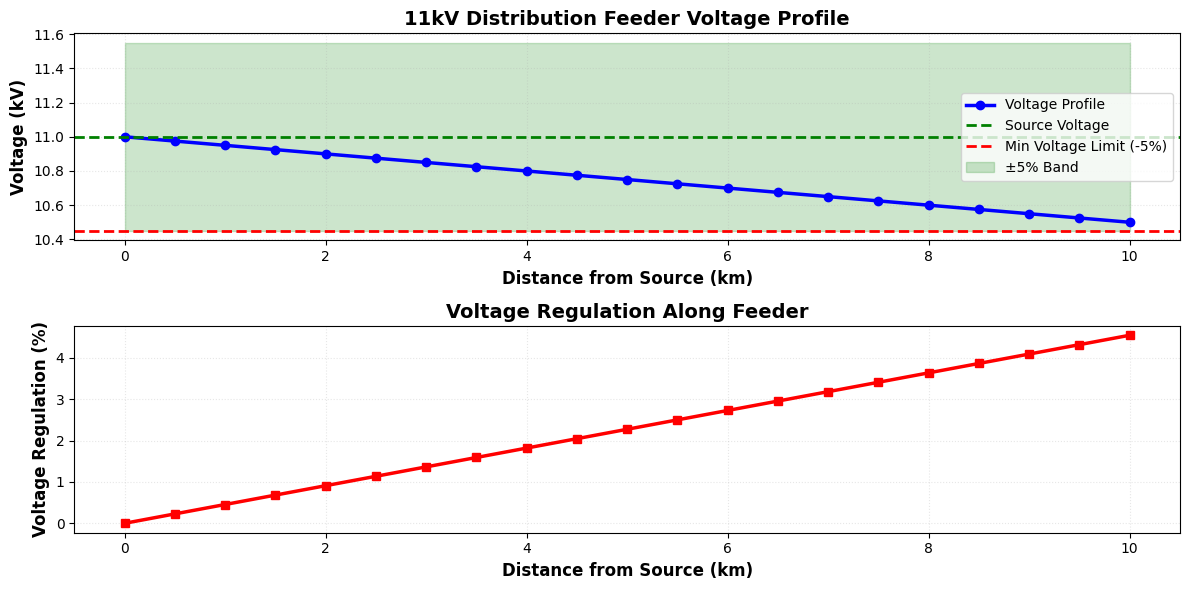

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Distribution feeder data (11 kV line, 10 km)
distance_km = np.linspace(0, 10, 21)  # Every 500m
voltage_kv = 11.0 - 0.05 * distance_km  # Voltage drop

# Calculate voltage regulation
regulation = ((11.0 - voltage_kv) / 11.0) * 100

plt.figure(figsize=(12, 6))

# Main voltage profile
plt.subplot(2, 1, 1)
plt.plot(distance_km, voltage_kv, 'b-', linewidth=2.5,
         marker='o', markersize=6, label='Voltage Profile')
plt.axhline(y=11.0, color='g', linestyle='--',
            linewidth=2, label='Source Voltage')
plt.axhline(y=10.45, color='r', linestyle='--',
            linewidth=2, label='Min Voltage Limit (-5%)')
plt.fill_between(distance_km, 10.45, 11.55,
                 alpha=0.2, color='green', label='±5% Band')

plt.xlabel('Distance from Source (km)', fontsize=12, fontweight='bold')
plt.ylabel('Voltage (kV)', fontsize=12, fontweight='bold')
plt.title('11kV Distribution Feeder Voltage Profile',
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3, linestyle=':')

# Voltage regulation
plt.subplot(2, 1, 2)
plt.plot(distance_km, regulation, 'r-', linewidth=2.5, marker='s')
plt.xlabel('Distance from Source (km)', fontsize=12, fontweight='bold')
plt.ylabel('Voltage Regulation (%)', fontsize=12, fontweight='bold')
plt.title('Voltage Regulation Along Feeder',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

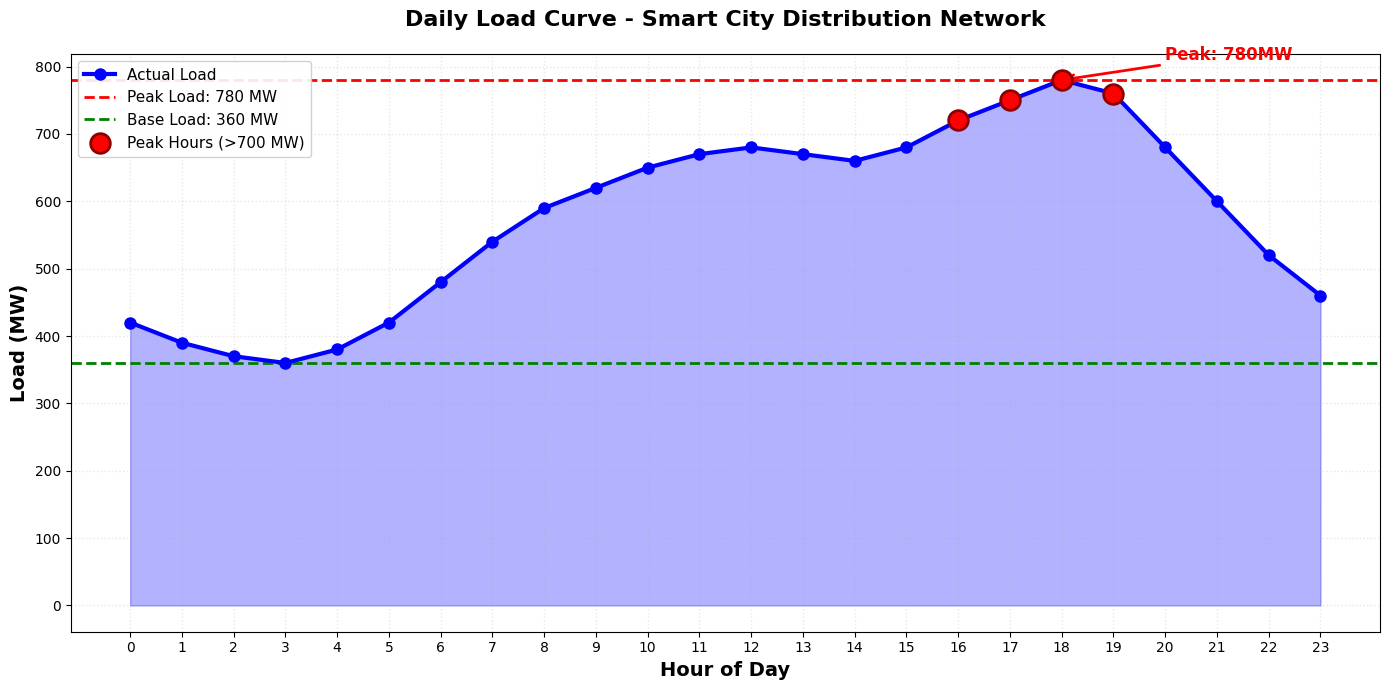

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hours = np.arange(0, 24)
load_mw = np.array([
    420, 390, 370, 360, 380, 420, 480, 540,  # 00:00-07:00
    590, 620, 650, 670, 680, 670, 660, 680,  # 08:00-15:00
    720, 750, 780, 760, 680, 600, 520, 460   # 16:00-23:00
])

fig, ax = plt.subplots(figsize=(14, 7))

# Plot load curve with gradient fill
ax.plot(hours, load_mw, 'b-', linewidth=3, marker='o',
        markersize=8, label='Actual Load', zorder=3)
ax.fill_between(hours, load_mw, alpha=0.3, color='blue')

# Add peak and base load lines
peak_load = load_mw.max()
base_load = load_mw.min()
ax.axhline(y=peak_load, color='r', linestyle='--',
           linewidth=2, label=f'Peak Load: {peak_load} MW')
ax.axhline(y=base_load, color='g', linestyle='--',
           linewidth=2, label=f'Base Load: {base_load} MW')

# Highlight peak hours
peak_hours = hours[load_mw > 700]
peak_loads = load_mw[load_mw > 700]
ax.scatter(peak_hours, peak_loads, color='red', s=200,
           zorder=4, edgecolor='darkred', linewidth=2,
           label='Peak Hours (>700 MW)')

# Annotations
ax.annotate(f'Peak: {peak_load}MW',
            xy=(np.argmax(load_mw), peak_load),
            xytext=(np.argmax(load_mw)+2, peak_load+30),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, fontweight='bold', color='red')

ax.set_xlabel('Hour of Day', fontsize=14, fontweight='bold')
ax.set_ylabel('Load (MW)', fontsize=14, fontweight='bold')
ax.set_title('Daily Load Curve - Smart City Distribution Network',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(hours)
ax.grid(True, alpha=0.3, linestyle=':', linewidth=1)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)

plt.tight_layout()
plt.show()

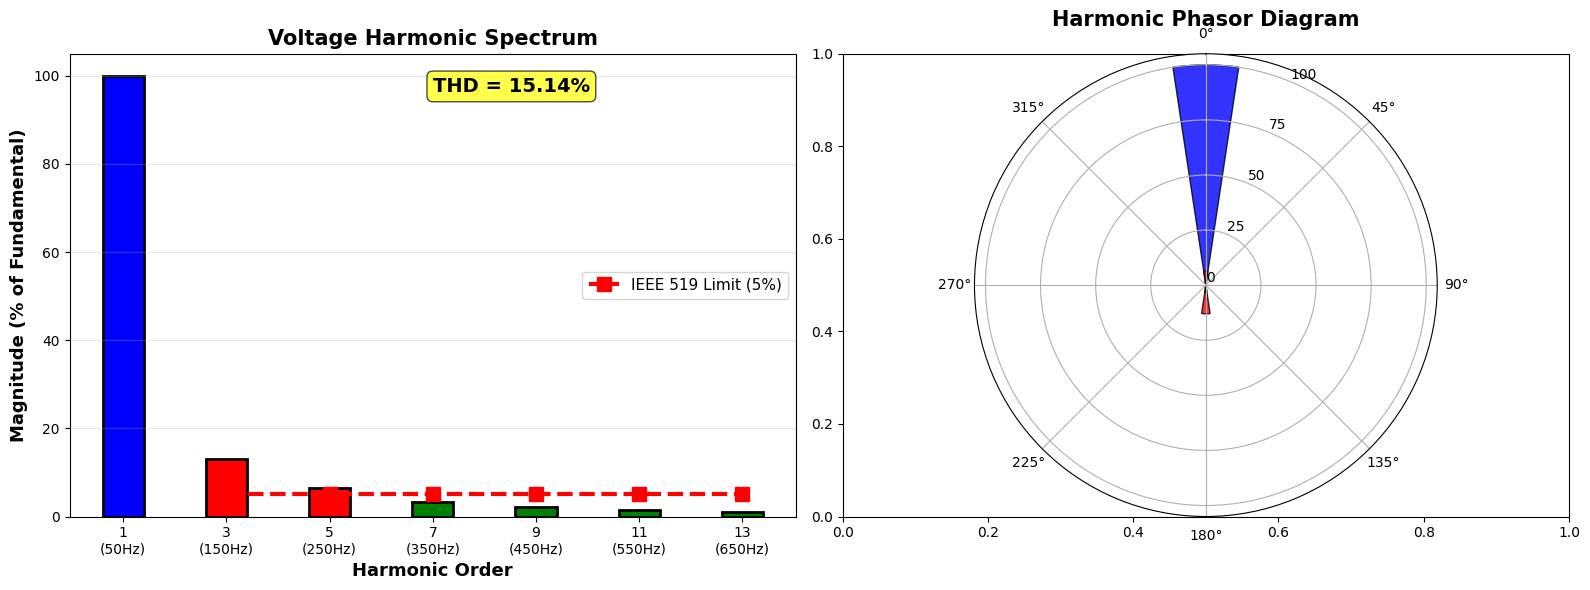

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Harmonic data from FFT analysis
harmonics = np.array([1, 3, 5, 7, 9, 11, 13])
magnitude_percent = np.array([100, 13.0, 6.5, 3.2, 2.1, 1.5, 1.0])

# IEEE 519 limits for voltage harmonics
ieee_limits = np.array([100, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
colors = ['green' if mag <= limit else 'red'
          for mag, limit in zip(magnitude_percent[1:], ieee_limits[1:])]
colors = ['blue'] + colors  # Fundamental is always blue

ax1.bar(harmonics, magnitude_percent, width=0.8,
        color=colors, edgecolor='black', linewidth=2)
ax1.plot(harmonics[1:], ieee_limits[1:], 'r--',
         linewidth=3, marker='s', markersize=10,
         label='IEEE 519 Limit (5%)')

ax1.set_xlabel('Harmonic Order', fontsize=13, fontweight='bold')
ax1.set_ylabel('Magnitude (% of Fundamental)', fontsize=13, fontweight='bold')
ax1.set_title('Voltage Harmonic Spectrum', fontsize=15, fontweight='bold')
ax1.set_xticks(harmonics)
ax1.set_xticklabels([f'{h}\n({h*50}Hz)' for h in harmonics])
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# THD Calculation
thd = np.sqrt(np.sum(magnitude_percent[1:]**2))
ax1.text(0.5, 0.95, f'THD = {thd:.2f}%',
         transform=ax1.transAxes, fontsize=14,
         fontweight='bold', verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Polar plot for phase angles
angles_deg = np.array([0, 180, 0, 180, 0, 180, 0])  # Typical pattern
angles_rad = np.deg2rad(angles_deg)

ax2 = plt.subplot(122, projection='polar')
ax2.bar(angles_rad, magnitude_percent, width=0.3,
        bottom=0, alpha=0.8, color=colors, edgecolor='black')
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.set_title('Harmonic Phasor Diagram',
              fontsize=15, fontweight='bold', pad=20)
ax2.set_rticks([0, 25, 50, 75, 100])

plt.tight_layout()
plt.show()

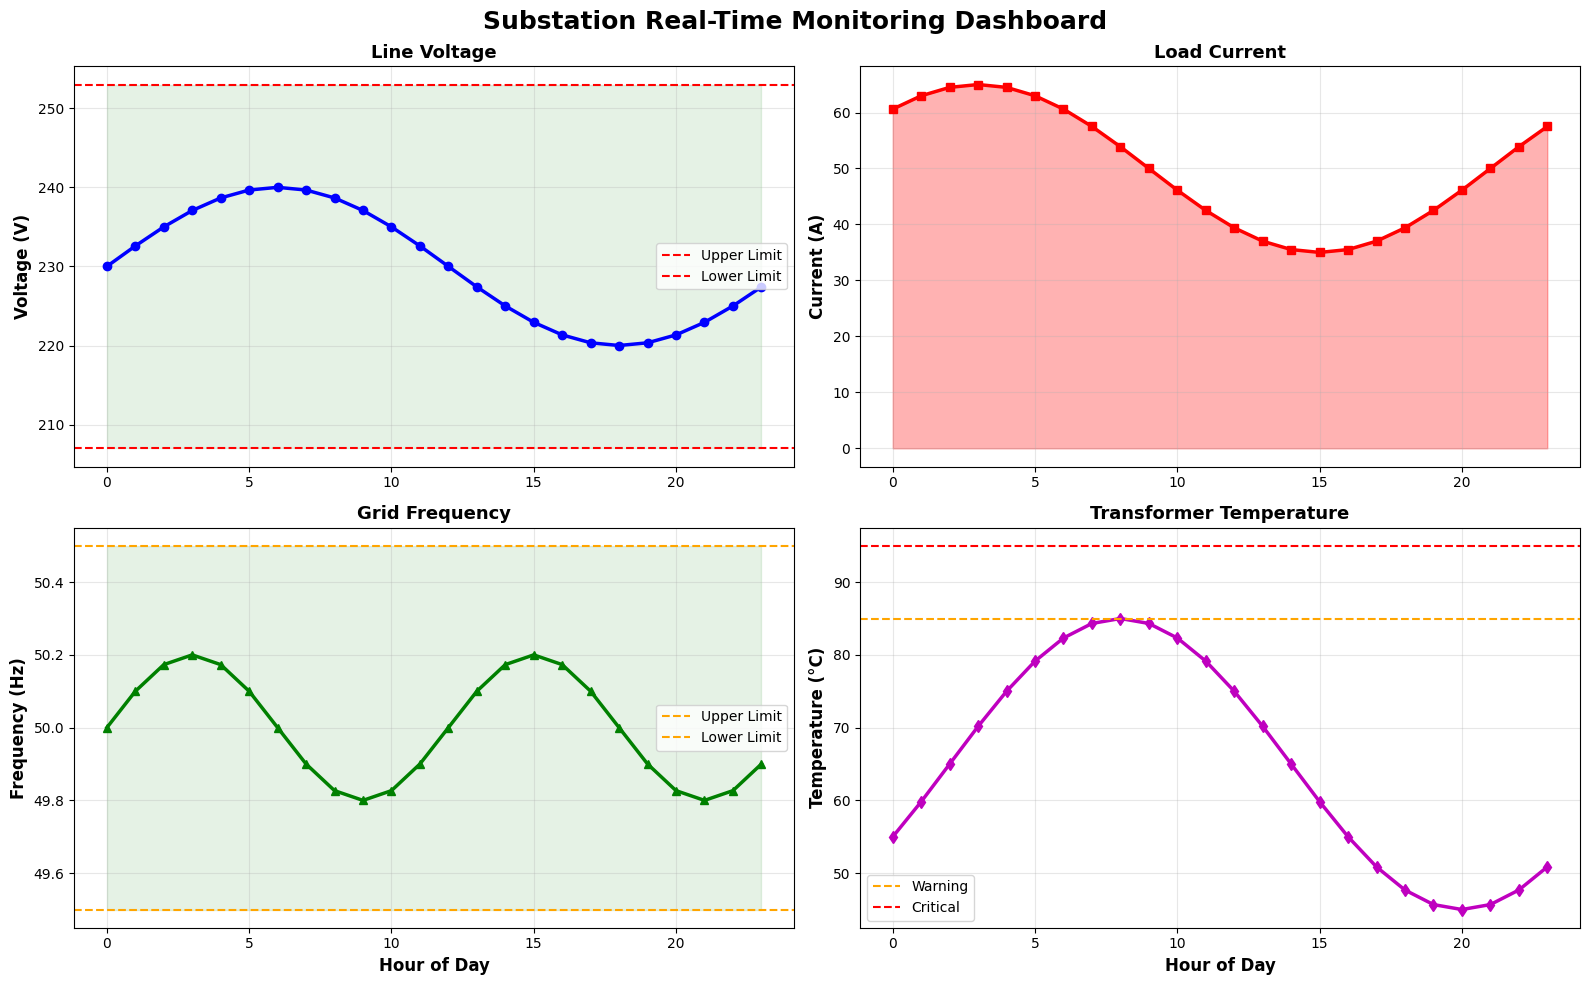

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
hours = np.arange(0, 24)
voltage = 230 + 10 * np.sin(2 * np.pi * hours / 24)
current = 50 + 15 * np.sin(2 * np.pi * hours / 24 + np.pi/4)
frequency = 50 + 0.2 * np.sin(2 * np.pi * hours / 12)
temperature = 65 + 20 * np.sin(2 * np.pi * hours / 24 - np.pi/6)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Substation Real-Time Monitoring Dashboard',
             fontsize=18, fontweight='bold', y=0.98)

# Voltage
ax1.plot(hours, voltage, 'b-', linewidth=2.5, marker='o')
ax1.axhline(y=253, color='r', linestyle='--', label='Upper Limit')
ax1.axhline(y=207, color='r', linestyle='--', label='Lower Limit')
ax1.fill_between(hours, 207, 253, alpha=0.1, color='green')
ax1.set_ylabel('Voltage (V)', fontsize=12, fontweight='bold')
ax1.set_title('Line Voltage', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Current
ax2.plot(hours, current, 'r-', linewidth=2.5, marker='s')
ax2.fill_between(hours, current, alpha=0.3, color='red')
ax2.set_ylabel('Current (A)', fontsize=12, fontweight='bold')
ax2.set_title('Load Current', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Frequency
ax3.plot(hours, frequency, 'g-', linewidth=2.5, marker='^')
ax3.axhline(y=50.5, color='orange', linestyle='--', label='Upper Limit')
ax3.axhline(y=49.5, color='orange', linestyle='--', label='Lower Limit')
ax3.fill_between(hours, 49.5, 50.5, alpha=0.1, color='green')
ax3.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax3.set_title('Grid Frequency', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Temperature
ax4.plot(hours, temperature, 'm-', linewidth=2.5, marker='d')
ax4.axhline(y=85, color='orange', linestyle='--', label='Warning')
ax4.axhline(y=95, color='r', linestyle='--', label='Critical')
ax4.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax4.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax4.set_title('Transformer Temperature', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Hour | Load (MVA) | Loading (%) | Overload | Loss (kW)
00   |    84.00   |      84.00   | YES   |   352.78
01   |    85.16   |      85.16   | YES   |   362.60
02   |    79.34   |      79.34   | NO    |   314.75
03   |    70.51   |      70.51   | NO    |   248.60
04   |    89.12   |      89.12   | YES   |   397.09
05   |    74.73   |      74.73   | NO    |   279.19
06   |    85.43   |      85.43   | YES   |   364.90
07   |    64.83   |      64.83   | NO    |   210.16
08   |    86.14   |      86.14   | YES   |   370.97
09   |    73.09   |      73.09   | NO    |   267.14
10   |    75.10   |      75.10   | NO    |   281.97
11   |    89.13   |      89.13   | YES   |   397.18
12   |    66.62   |      66.62   | NO    |   221.91
13   |    72.35   |      72.35   | NO    |   261.70
14   |    78.20   |      78.20   | NO    |   305.78
15   |    88.43   |      88.43   | YES   |   391.01
16   |    61.13   |      61.13   | NO    |   186.87
17   |    60.17   |      60.17   | NO    |   181.00
18   |   

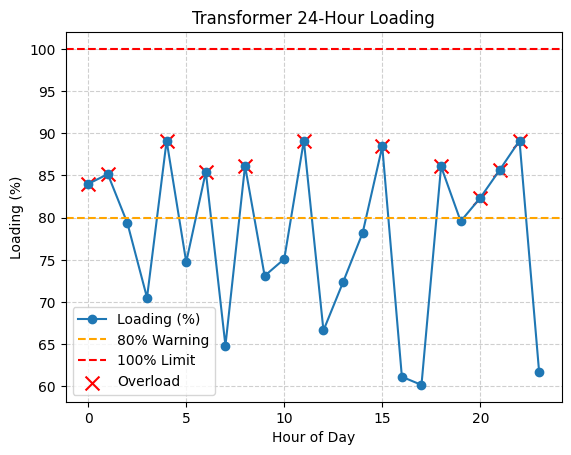

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Basic data
rated_MVA = 100
full_load_loss = 500_000   # 500 kW
hours = range(24)

# 1️⃣ Generate random load data (60–90 MVA)
load = np.random.uniform(60, 90, 24)

# 2️⃣ Calculate % loading
loading_pct = load / rated_MVA * 100

# 3️⃣ Identify overloads (>80%)
overload = loading_pct > 80

# 4️⃣ Average daily loading
avg_load = loading_pct.mean()

# 5️⃣ Calculate losses
losses = (loading_pct / 100) ** 2 * full_load_loss

# Print summary
print("Hour | Load (MVA) | Loading (%) | Overload | Loss (kW)")
for h in range(24):
    print(f"{h:02d}   | {load[h]:8.2f}   | {loading_pct[h]:10.2f}   | {'YES' if overload[h] else 'NO '}   | {losses[h]/1000:8.2f}")

print(f"\nAverage Loading: {avg_load:.2f}%")

# 6️⃣ Plot
plt.plot(hours, loading_pct, marker='o', label='Loading (%)')
plt.axhline(80, color='orange', linestyle='--', label='80% Warning')
plt.axhline(100, color='red', linestyle='--', label='100% Limit')
plt.scatter(np.where(overload)[0], loading_pct[overload], color='red', marker='x', s=100, label='Overload')
plt.title("Transformer 24-Hour Loading")
plt.xlabel("Hour of Day")
plt.ylabel("Loading (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
